In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.interpolate
from statsmodels.distributions.empirical_distribution import ECDF
import os.path


Read stored data from files containing the PAPR matrizes.
Store this data in variable PAPR_list

In [2]:
## read data
file_id = 0

my_path = "papr_data_" + str(file_id) + ".dat"
file_existing = os.path.isfile(my_path)

PAPR_list = list()

while file_existing is True:
    my_file = open(my_path)

    # read the file contents
    data = my_file.readlines()

    # extract title info
    title_info = data[0].rstrip()
    print("read file: " + title_info)    

    # extract the PAPR data
    PAPR_values_string = data[1:]
    # convert the values elementwise to floats
    PAPR = [float(value) for value in PAPR_values_string]

    # append data block to list
    PAPR_list.append((PAPR, title_info))

    my_file.close()

    file_id = file_id + 1
    my_path = "papr_data_" + str(file_id) + ".dat"
    file_existing = os.path.isfile(my_path)


read file: 16qam_256_subcarriers_clipping_1.2_nofiltering
read file: 16qam_256_subcarriers_no_clipping
read file: 16qam_256_subcarriers_clipping_1.2_and_filtering
read file: 16qam_256_subcarriers_clipping_1.4_and_filtering
read file: 16qam_256_subcarriers_clipping_2_and_filtering


compute the ccdf of ofdm_time signal

https://www.youtube.com/watch?v=-7U82ZzIbUs  
https://rfmw.em.keysight.com/wireless/helpfiles/n7616b/understanding_ccdf_curves.htm  
https://en.wikipedia.org/wiki/Cumulative_distribution_function  
 
ECDF = Empirical Cumulative Distribution Function  

ECDF (statsmodels.distributions.empirical_distribution)  
---------------------
ECDF.x  
ECDF.y  
ECDF.side  
ECDF.n  

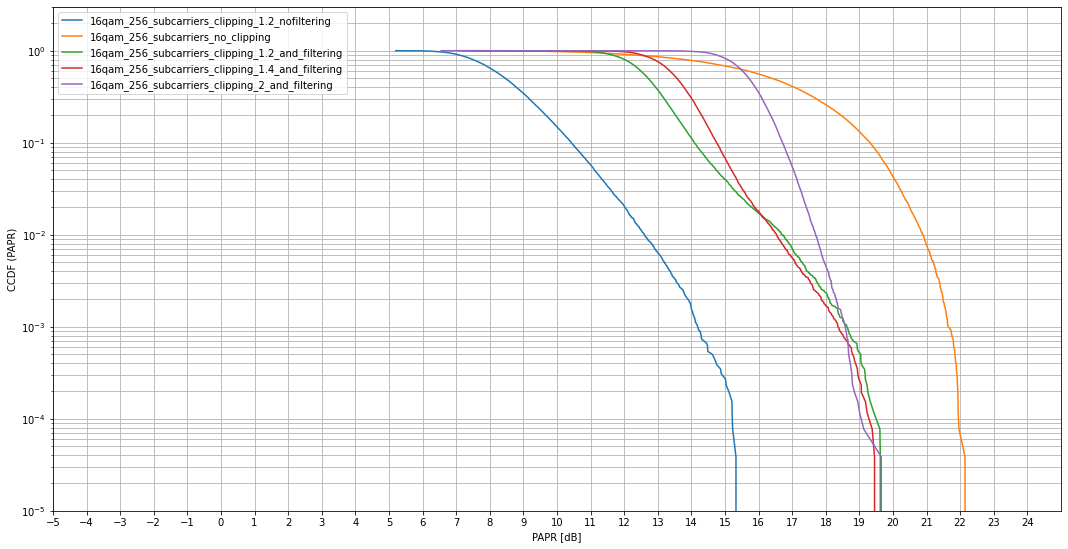

In [3]:
xlim_min = -5
xlim_max = 25
ylim_min = np.power(10.0, -5.0)
ylim_max = np.power(10, 0) + 2
x_tick_distance = 1

# create figure object to plot on
fig1 = plt.figure(figsize=(14, 7))
# arguments of add_axes are overwritten by plt.xlim and plt.ylim
ax1 = fig1.add_axes([-20, 0, 1,1])
plt.xlabel('PAPR [dB]')
plt.ylabel('CCDF (PAPR)')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.xlim(xlim_min, xlim_max)
plt.ylim(ylim_min, ylim_max)

plt.xticks(np.arange(xlim_min, xlim_max, x_tick_distance))

legend_list = list()

for (PAPR, title_info) in PAPR_list:        
        cdf = ECDF(PAPR)  # cumulative distribution function (CDF)
        ccdf = 1 - cdf.y  # complementary cdf (CCDF)
        
        ax1.plot(cdf.x, ccdf)                             
        #ax1.semilogy(cdf.x, ccdf)              
        
        legend_list.append(title_info)
        

ax1.set_yscale('log')
ax1.legend(legend_list)

plt.show()